Index(['transd', 'ha', 'mrt', 'convs', 'lat', 'long', 'hp'], dtype='object')
(414, 7)
transd    float64
ha        float64
mrt       float64
convs       int64
lat       float64
long      float64
hp        float64
dtype: object
     transd    ha        mrt  convs       lat       long    hp
0  2012.917  32.0   84.87882     10  24.98298  121.54024  37.9
1  2012.917  19.5  306.59470      9  24.98034  121.53951  42.2
2  2013.583  13.3  561.98450      5  24.98746  121.54391  47.3
3  2013.500  13.3  561.98450      5  24.98746  121.54391  54.8
4  2012.833   5.0  390.56840      5  24.97937  121.54245  43.1
          transd        ha       mrt     convs       lat      long        hp
transd  1.000000  0.017549  0.060880  0.009635  0.035058 -0.041082  0.087491
ha      0.017549  1.000000  0.025622  0.049593  0.054420 -0.048520 -0.210567
mrt     0.060880  0.025622  1.000000 -0.602519 -0.591067 -0.806317 -0.673613
convs   0.009635  0.049593 -0.602519  1.000000  0.444143  0.449099  0.571005
lat     0.0

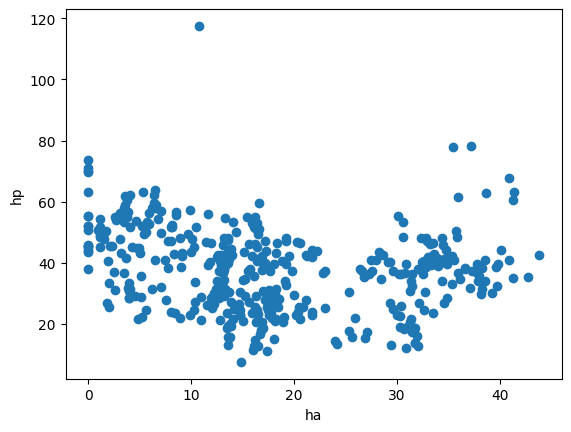

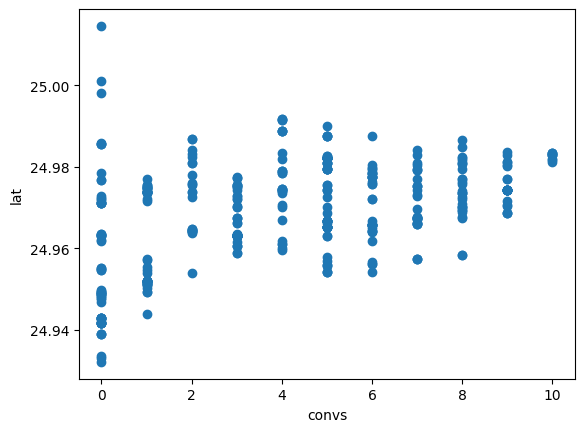

       transd    ha        mrt  convs       lat       long
396  2012.667  37.1   918.6357      1  24.97198  121.55063
239  2013.500  18.1   837.7233      0  24.96334  121.54767
83   2012.917  25.3  2707.3920      3  24.96056  121.50831
168  2013.083  27.6   515.1122      5  24.96299  121.54320
323  2013.417  28.6   197.1338      6  24.97631  121.54436
..        ...   ...        ...    ...       ...        ...
71   2013.083  35.5   640.7391      3  24.97563  121.53715
106  2013.083  17.2   189.5181      8  24.97707  121.54308
270  2013.333  10.8   252.5822      1  24.97460  121.53046
348  2012.833   4.6   259.6607      6  24.97585  121.54516
102  2013.083   1.1   193.5845      6  24.96571  121.54089

[277 rows x 6 columns]
396     31.9
239     29.7
83      17.7
168     37.4
323     42.5
       ...  
71      40.8
106     47.1
270    117.5
348     53.7
102     54.4
Name: hp, Length: 277, dtype: float64
       transd    ha        mrt  convs       lat       long
358  2013.167   1.1   193.58

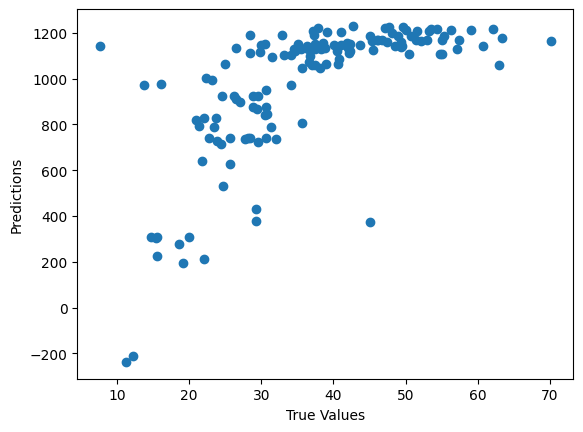

[[ 94.45346779]
 [ 17.84922384]
 [ 29.92242909]
 [163.34494533]
 [129.59166433]
 [113.38179749]
 [ 69.59967968]
 [172.44755044]
 [180.60211788]
 [ 46.08783241]
 [ 65.36109625]
 [181.37632988]
 [164.59287374]
 [ 83.14144091]
 [188.40988494]
 [176.51558702]
 [ 56.02504309]
 [152.5954587 ]
 [ 81.98607365]
 [ 67.73813356]
 [123.158091  ]
 [ 15.19350436]
 [145.67684283]
 [ 92.20048305]
 [ 70.88140738]
 [ 60.90204478]
 [ 85.15913962]
 [ 69.08367576]
 [125.64822446]
 [130.84159566]
 [  9.55500887]
 [ 20.25250145]
 [ 59.9162439 ]
 [ 76.16708327]
 [150.28732576]
 [108.59745041]
 [136.9758259 ]
 [139.22207082]
 [160.22621025]
 [ 76.45046474]
 [ 80.60762012]
 [193.68285491]
 [ 42.1046251 ]
 [ 26.98226124]
 [125.80619431]
 [191.71753274]
 [ 31.91956799]
 [ 21.50372254]
 [146.89255718]
 [ 87.25256807]
 [114.92452915]
 [175.30194673]
 [  5.7085299 ]
 [129.75323054]
 [119.55721068]
 [ 70.09100951]
 [140.48732749]
 [100.18181729]
 [175.64208996]
 [ 95.15451524]
 [168.88289091]
 [ 92.39868956]
 [ 30.81

In [28]:
from keras import layers
from keras import utils
from keras.models import Sequential
from keras.layers import Dense
from keras.regularizers import l2

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
from sklearn import linear_model

from sklearn.model_selection import train_test_split

# Real Estate Valuation Data

# transd = transaction date
# ha = house age
# mrt = distance to the nearest MRT station
# convs = number of convenience stores
# lat = latitude
# long = longitude
# hp = house price of unit area

columns =['transd','ha','mrt','convs','lat','long','hp']

real_estate_data = pd.read_csv('/content/sample_data/Real estate valuation data set.csv', names=columns)

print(real_estate_data.keys())


# show dimension, datatype, and first 5 rows of real_estate data

print(real_estate_data.shape)
print(real_estate_data.dtypes)
print(real_estate_data.head())

# show correlation between attributes.


real_estate_corr_var = real_estate_data.corr()
print(real_estate_corr_var)

# use corr with pearson

real_estate_data.keys()

print(st.pearsonr(real_estate_data.transd,real_estate_data.ha))


# for each attribute, show mean, count, std, min, max, etc # use describe

real_estate_data.describe()

# Visualization
# We want to show the relationship between ‘ha’ attribute and ‘hp’(target) attribute

x_val = real_estate_data.ha
y_val = real_estate_data.hp

plt.scatter(x_val, y_val)
plt.xlabel('ha')
plt.ylabel('hp')
plt.show()


# choose another attribute and draw similar graph as above

a_val = real_estate_data.convs
b_val = real_estate_data.lat

plt.scatter(a_val, b_val)
plt.xlabel('convs')
plt.ylabel('lat')
plt.show()

# With .pop() command, the associated columns are extracted
# select input attributes wo target attributes

Y = real_estate_data.pop('hp')
X = real_estate_data

# split X, Y into X_train, X_test, Y_train, Y_test

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

print(X_train)
print(Y_train)
print(X_test)
print(Y_test)

# Show that split is correctly done
# you can show the shape of each data & first 5 rows of each data

print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

print(X_train.head())
print(Y_train.head())
print(X_test.head())
print(Y_test.head())

# MSE linear regression model in Keras
# We don't specify anything for activation -> no activation is applied # (ie. "linear" activation: a(x) = x)

model = Sequential()

model.add(Dense(1, input_dim=6))




# you can change optimizer or loss function, if you want
# use adam as an optimizer and mse(mean squared error) as the error function


model.compile(optimizer='adam', loss='mse')


# train linear regression model
# you can change the values of batch_size and epochs


model.fit(X_train, Y_train, batch_size=16, epochs=10, validation_data=(X_test, Y_test))



# show the structure of network


model.summary()



# show the coefficients of linear regression


print(model.layers[0].get_weights()[0])
print(model.layers[0].get_weights()[1])


# show the error value


model.evaluate(X_train,Y_train)


Y_predictions = model.predict(X_test)
print('prediction: ', Y_predictions.flatten())
print('Y_test: ', Y_test)


# show the relationalship between label and predictions

plt.scatter(Y_test, Y_predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.show()


# Using a certain input data, compute the linear regression output # use predict

var1 = np.arange(1,201)
var2 = var1 + np.random.normal(size=200,loc=0,scale=2)

data_frame_1 = pd.DataFrame(data=var1)
data_frame_2 = pd.DataFrame(data=var2)

reg = linear_model.LinearRegression()

var1_train,var1_test,var2_train,var2_test = train_test_split(data_frame_1,data_frame_2,test_size=0.40,random_state=42)

reg.fit(var1_train,var2_train)

var1_pred = reg.predict(var2_test)
print(var1_pred)

print(var1_test)



















